# 머신 러닝 교과서 3판

# 2장 - 분류를 위한 머신러닝 알고리즘 훈련

**아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

### 목차

- 인공 뉴런: 초기 머신 러닝의 간단한 역사
    - 인공 뉴런의 수학적 정의
    - 퍼셉트론 학습 규칙
- 파이썬으로 퍼셉트론 학습 알고리즘 구현
    - 객체 지향 퍼셉트론 API
    - 붓꽃 데이터셋에서 퍼셉트론 훈련
- 적응형 선형 뉴런과 학습의 수렴
    - 경사 하강법으로 비용 함수 최소화
    - 파이썬으로 아달린 구현
    - 특성 스케일을 조정하여 경사 하강법 결과 향상
    - 대규모 머신 러닝과 확률적 경사 하강법
- 요약

<br>
<br>

In [2]:
from IPython.display import Image

# 인공 뉴런: 초기 머신 러닝의 간단한 역사

In [3]:
Image(url='https://git.io/JtIbf', width=500) 

## 퍼셉트론이란?
퍼셉트론(인공뉴런): 다수의 신호를 입력으로 받아 하나의 신호를 출력

신호: 흐른다(1), 흐르지 않는다(0) 두 가지 값을 가짐.

입력신호: x1, x2

출력신호: y

가중치: w1, w2(w는 weight의 머리글자)

퍼셉트론에서는 가중치가 클수록 강한 신호를 흘림.

전류에서 말하는 저항. 저항이 낮을 수록 큰 전류가 흐름.

뉴런, 노드: x1, x2, y

입력신호가 뉴런에 보내질 때 가각 고유한 가중치가 곱해짐. (w1x1, w2x2)

뉴런이 활성화: 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력

임계값: 정해진 한계. 세타 기호로 표현  

y=0(w1x1+w2x2<=theta)  
y=1(w1x1+w2x2>theta)

## 간단한 구현

### And 게이트

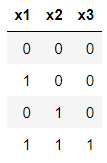

In [2]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [3]:
print(AND(0, 0)) # 0을 출력
print(AND(1, 0)) # 0을 출력
print(AND(0, 1)) # 0을 출력
print(AND(1, 1)) # 1을 출력

0
0
0
1


### 편향 적용

세타를 -b로 치환하면 다음처럼 퍼셉트론 동작이 변경됨

b를 편향(bias)라고 함

y=0(b+w1x1+w2x2<=0)  
y=1(b+w1x1+w2x2>0)

In [4]:
import numpy as np
x = np.array([0, 1])     # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7                 # 편향
w*x

array([0. , 0.5])

In [5]:
np.sum(w*x)

0.5

In [6]:
np.sum(w*x) + b

-0.19999999999999996

In [12]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [9]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    print(AND(xs[0], xs[1]))

0
0
0
1


## 인공 뉴런의 수학적 정의

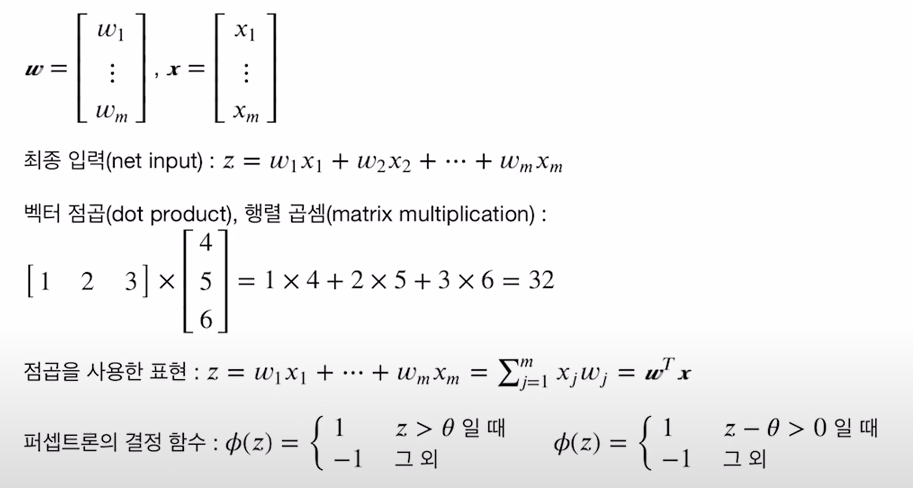

θ(쎄타): 임계값

In [4]:
Image(url='https://git.io/JtIbL', width=500) 

## 퍼셉트론 학습 규칙

$\Delta w_j$ : j번째 가중치, $y^{(i)}$ : y의 i번째 값, $x_j^{(i)}$ : x의 j 특성의 i번째 값

$\hat{y}^{(i)}$ : i번째 예측값(1 또는 -1), $\eta$ : 학습률

훈련데이터 i행의 실제 값에서 예측값을 뺀 값에 j번째 특성의 i행 값을 곲한 결과에 학습률을 곱한다.

$\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$

기존의 j번째 가중치에 업데이트 된 가중치를 더함

$w_j := w_j + \Delta w_j$

클래스 레이블을 정확히 예측한 경우: 가중치를 업데이트 할 필요가 없다.
$y^{(i)}=-1, \quad \hat{y}^{(i)}=-1, \qquad \Delta w_j=\eta(-1-(-1))x_j^{(i)}=0$

$y^{(i)}=1, \quad \hat{y}^{(i)}=1, \qquad \Delta w_j=\eta(1-1))x_j^{(i)}=0$

클래스 레이블을 잘못 예측한 경우

In [ ]:
음성 클래스로 예측을 했지만 실제값은 양성, 양성 클래스로 예측하기 위하여 가중치를 양성클래스 쪽으로 이동한다.

$y^{(i)}=1, \quad \hat{y}^{(i)}=-1, \qquad \Delta w_j=\eta(1-(-1))x_j^{(i)}=\eta(2)x_j^{(i)}$

$y^{(i)}=-1, \quad \hat{y}^{(i)}=1, \qquad \Delta w_j=\eta(-1-1))x_j^{(i)}=\eta(-2)x_j^{(i)}$

$\hat{y}^{(i)}=-1, \quad y^{(i)}=+1, \quad \eta=1$

$\Delta w_j=(1-(-1))0.5=(2)0.5=1$

$\Delta w_j=(1-(-1))2=(2)2=4$

In [ ]:
Image(url='https://git.io/JtIbq', width=600) 

In [ ]:
Image(url='https://git.io/JtIbO', width=600) 

<br>
<br>

# 파이썬으로 퍼셉트론 학습 알고리즘 구현

## 객체 지향 퍼셉트론 API

In [ ]:
import numpy as np


class Perceptron(object):
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        # scale: 표준 편차 0.01, size: 특성 개수 보다 1개 크게 만든다. (절편 고려)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

<br>
<br>

## 붓꽃 데이터셋에서 퍼셉트론 훈련

...

### 붓꽃 데이터셋 읽기

In [ ]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<hr>

### 노트:

이 깃허브에는 붓꽃 데이터셋이 포함되어 있습니다(이 책에서 사용하는 다른 데이터셋도 모두 포함되어 있습니다). 인터넷에 연결되어 있지 않거나 이따금 UCI 서버(https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)에 접근할 수 없을 때 사용할 수 있습니다. 이런 경우 로컬 디렉터리에서 붓꽃 데이터를 로드하려면 다음 코드를
```python
    df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
```
다음과 같이 바꿉니다.
```python 
    df = pd.read_csv('your/local/path/to/iris.data', header=None)
```

그다음 다음 코드를 실행합니다.
```python
    df = pd.read_csv('iris.data', header=None, encoding='utf-8')
    df.tail()
```

<hr>

<br>
<br>

### 붓꽃 데이터 그래프 그리기

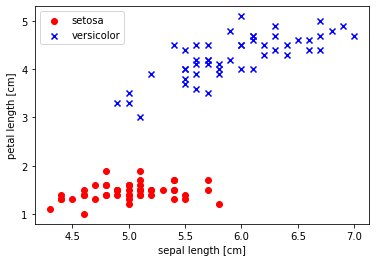

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다
X = df.iloc[0:100, [0, 2]].values

# 산점도를 그립니다
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

<br>
<br>

### 퍼셉트론 모델 훈련하기

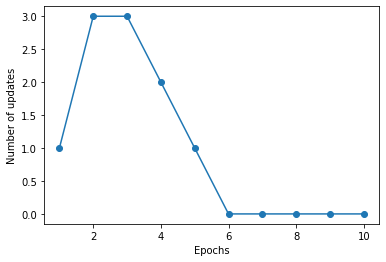

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

<br>
<br>

### 결정 경계 그래프 함수

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

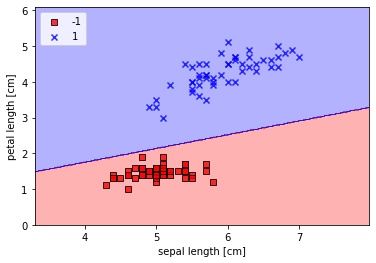

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

<br>
<br>

# 적응형 선형 뉴런과 학습의 수렴

...

## 경사 하강법으로 비용 함수 최소화

In [ ]:
Image(url='https://git.io/JtIbn', width=600) 

In [ ]:
Image(url='https://git.io/JtIbc', width=500)

<br>
<br>

## 파이썬으로 아달린 구현하기

In [ ]:
class AdalineGD(object):
    """적응형 선형 뉴런 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # 이 코드의 활성화 함수는 항등 함수(identity function)이기 때문에
            # 아무런 효과가 없습니다.
            # 이 대신 `output = self.net_input(X)`로 바로 쓸 수 있습니다.
            # 이 활성화 함수는 개념적인 목적을 위해 만들었습니다.
            # (잠시 후에 보게 될) 로지스틱 회귀의 경우 이 함수를 시그모이드 함수로 
            # 바꾸어 로지스틱 회귀 분류기를 구현합니다.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

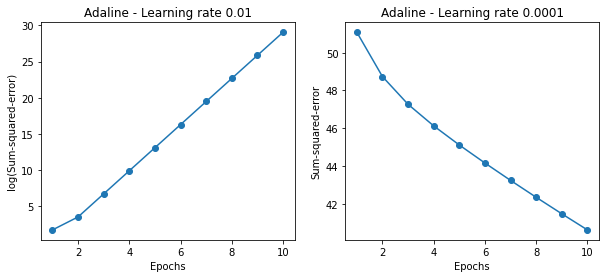

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

<br>
<br>

In [ ]:
Image(url='https://git.io/JtIb4', width=700) 

<br>
<br>

## 특성 스케일을 조정하여 경사 하강법 결과 향상시키기

In [ ]:
Image(url='https://git.io/JtIbB', width=700) 

In [ ]:
# 특성을 표준화합니다.
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

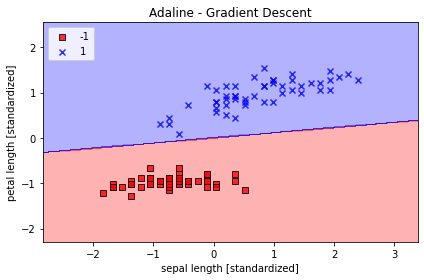

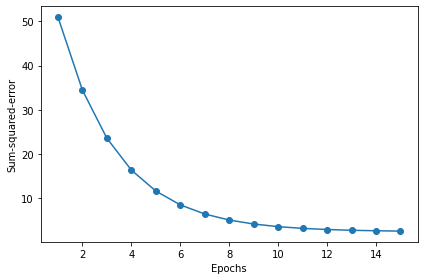

In [ ]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

<br>
<br>

## 대규모 머신 러닝과 확률적 경사 하강법

In [ ]:
class AdalineSGD(object):
    """ADAptive LInear NEuron 분류기

    Parameters
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
      True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    Attributes
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """훈련 데이터 학습

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 벡터

        반환값
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """훈련 데이터를 섞습니다"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

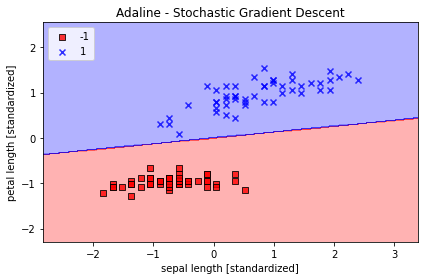

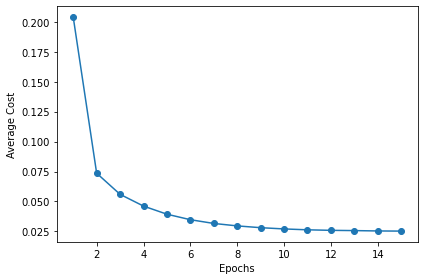

In [ ]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [ ]:
ada_sgd.partial_fit(X_std[0, :], y[0])

<br>
<br>

# 요약

...